# The Monty Hall Problem

The Monty Hall problem is a brain teaser and probability puzzle. Famously employed by the game show *Let's Make A Deal*, the problem is named after the show's host Monty Hall. However, there was also significant academic interest in the theoretical solutions to the problem starting in the 1970s.

Here is a description of the problem, as posed in a Parade magazine column in 1990:

>Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

While it may be implied by the question, for additional clarification:

1. The host must always open a door that was not selected by the contestant.
2. The host must always open a door to reveal a goat and never the car.
3. The host must always offer the chance to switch between the door chosen originally and the closed door remaining.

This seemingly simple problem has confounded all kinds of people from game show contestants, to statisticians, to game theorists. After Marilyn vos Savant posited in her aforementioned magazine column that switching doors would lead to a 2/3 chance of success, approximately 10,000 readers—nearly 1,000 with PhDs—wrote to the magazine, largely contesting her attestation. Savant's response turned out to be the accepted solution.

Even when confronted with written explanations, statistical probabilities, and mathematical proofs, people (including myself) struggled to accept that switching made such an impact on the chances of winning. Celebrated mathematician Paul Erdos consistently denied this solution until he was shown a computer simulation which demonstrated Savant's predicted result.

My own struggles with this absurdly counterintuitive paradox have led me to the same conclusion: despite abundant theoretical evidence, I need a computer simulation to confirm this solution. This notebook shows a demonstration of the problem where you can make the decision for yourself, a brief overview of the statistical solutions, and a simulation of each strategy.

## Demonstration
Run the following code blocks for an interactive demonstration of the game.

The main function is called `make_deal()` in reference to the most famous example of this game: the TV show *Let's Make A Deal*.

In [1]:
# set up dependencies
from monty_hall import make_deal
import matplotlib.pyplot as plt

# run demo
make_deal()


Welcome! You find yourself facing the Monty Hall Problem.

There are 3 doors in front of you. Behind one door is a car, but behind the other two there is a goat.
If you pick the right door, you win the new car! Are you ready to play?


You've chosen Door #1.

We're now going to reveal what's behind Door #3.
...
...
...
A goat!

Now you have an opportunity.
You can Stay and keep the prize behind Door #1, or you can Switch to Door #2.


So you originally chose Door #1, but you've decided to SWITCH to Door #2.
We've already revealed that there was a goat behind Door #3.
Let's see if you made the right decision! We can now reveal that behind Door #2 is a...
...
...
...

CAR!

You made the right decision to switch to Door #2. You won!



## Analysis
Let's break down what makes such a simple game into a confounding statistical question.

### Probabilties

There are statistical solutions based on simple probability and conditional probability.

It's important to reiterate the standard assumptions because any variation will change the math involved. They are:

1. The host must always open a door that was not selected by the contestant.
2. The host must always open a door to reveal a goat and never the car.
3. The host must always offer the chance to switch between the door chosen originally and the closed door remaining.

For the sake of demonstration, let's also assume that the contestant always chooses Door #1. The probabilities do not change based on the door chosen, so we'll assume a consistent selection for clarity.

#### Simple solution

Savant posed the following in support of her simple solution. She argued that there are essentially only 3 possible scenarios and 6 possible outcomes (based on having the 2 options of switching or staying in each scenario).

| Behind door #1 | Behind door #2 | Behind door #3 | Result if staying at door #1 | Result if switching to the door offered |
|:-------------:|:-------------:|:-------------:|:----------------------------:|:---------------------------------------:|
|      Goat     |      Goat     |      Car      |           Wins goat          |                 Wins car                |
|      Goat     |      Car      |      Goat     |           Wins goat          |                 Wins car                |
|      Car      |      Goat     |      Goat     |           Wins car           |                Wins goat                |

The intuitive explanation is that if the contestant chose a goat (2/3 chance), then they will always win by switching because the host had to reveal the other goat, leaving only the car. If the contestant chose the car (1/3 chance), then they will always lose by switching.

The chance of winning with each strategy is based solely on whether the contestant initially chose a goat or the car:

- Switch: if the contestant initially chose a goat, then they win.
- Stay: if the contestant initially chose a goat, then they lose.

Given a 2/3 chance to initially choose a goat, the switching strategy gives a 2/3 chance to win, and the staying strategy gives a 2/3 chance to lose (1/3 chance to win). Therefore, Savant concluded that a switching strategy was optimal and resulted in a 2/3 chance of winning.

#### Conditional probability

Another approach is the direct calculation of conditional probabilities based on which door the host opens.

Here is a decision tree of the 4 possible scenarios which result from selecting door #1, varying by the location of the car and which door the host opens:

<img src="visualizations/monty_hall_tree.jpeg" alt_text="Decision Tree of Possible Outcomes" width="640" height="340">

We can calculate the conditional probability of winning by switching. Given the contestant initially picks door #1 and the host opens door #3, the winning chance is the probability for the event "car is behind door #2 and host opens door #3" divided by the probability for "host opens door #3".

By referring to the decision tree, this calculation comes to $\frac{\frac{1}{3}}{\frac{1}{3}+\frac{1}{6}} = \dfrac{2}{3}$.

By symmetry, this 2/3 chance of winning by switching also holds when applied to the host opening door #2. Because of this calculation of conditional probability, the intuitive conclusion was reached that the simple solutions and conditional probability solutions were aligned.

Note: there is also a proof by conditional probabilities using Bayes' theorem. More information on that can be found at the [Internet's Free Encyclopedia](https://en.wikipedia.org/wiki/Monty_Hall_problem#Bayes'_theorem).

### Simulation

>"Wow, that's a lotta words... Too bad I'm not reading 'em." – Duke Nukem

Enough math and logic—does it actually work? Let's analyze the *demonstrated* likelihood of winning with each strategy.

In [2]:
# set up simulations
n_sim = 1000000
print(f"Number of simulations run: {n_sim:,}")

# simulate results when switching
prizes_switch = []
for _ in range(n_sim):
    prizes_switch.append(make_deal(demo_mode=False, switch_decision='y'))
perc_switch = prizes_switch.count('car') / n_sim * 100
print(f"Winning percentage when switching: {perc_switch:.1f}%")

# simulate results when staying
prizes_stay = []
for _ in range(n_sim):
    prizes_stay.append(make_deal(demo_mode=False, switch_decision='n'))
perc_stay = prizes_stay.count('car') / n_sim * 100
print(f"Winning percentage when staying: {perc_stay:.1f}%")

Number of simulations run: 1,000,000
Winning percentage when switching: 66.6%
Winning percentage when staying: 33.4%


The simulations support the theory that switching gives a 2/3 chance of success and staying gives a 1/3 chance of success.

The greater number of simulations run, the closer the winning percentages will get to 66.7% and 33.3%.

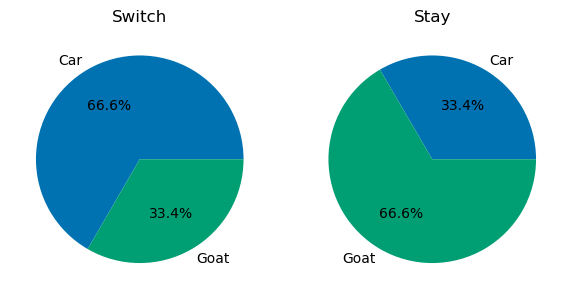

In [3]:
# visualization data
data_labels = ['Car', 'Goat']
switch_values = [prizes_switch.count('car'), prizes_switch.count('goat')]
stay_values = [prizes_stay.count('car'), prizes_stay.count('goat')]

# style
plt.style.use('seaborn-v0_8-colorblind')

# create subplots
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# create switch chart
axs[0].pie(switch_values, labels=data_labels, autopct='%1.1f%%')
axs[0].set_title('Switch')

# create stay chart
axs[1].pie(stay_values, labels=data_labels, autopct='%1.1f%%')
axs[1].set_title('Stay')

# save and display
plt.savefig('visualizations/simulation_results.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

## Conclusions

Cognitive psychologist Massimo Piattelli Palmarini wrote:
>"No other statistical puzzle comes so close to fooling all the people all the time that even Nobel physicists systematically give the wrong answer, and that they insist on it, and they are ready to berate in print those who propose the right answer"

So why do people so consistently fail to grasp a problem that apparently [doesn't even stump pigeons](https://pmc.ncbi.nlm.nih.gov/articles/PMC3086893/)? There are a few psychological phenomena which may be at play:

1. Endowment effect—people tend to overvalue what is already "owned".
2. Status quo bias—people prefer to preserve a choice they already made.
3. Errors of omission versus errors of commission—people prefer to make errors by inaction (Stay) rather than action (Switch).

There are also explanations which focus on the real-world application of the problem. When actually posed in a game show, the contestant may feel like the host is trying to trick them out of winning. All of the standard assumptions aren't laid out, so they may assume the host would only open a door as a ploy to entice them to give up a door with the car.

However, repeatedly, even presented with the standard assumptions and no real stakes, people from all walks of life insist that switching makes no difference. As we've seen here through intuitive solutions, conditional probabilties, and simulations: the path less traveled by makes all the difference.

I hope this notebook has been as helpful for you in understanding this infamous problem as it has been for me. For more information about the history, proofs, and variations of the Monty Hall problem, I would highly recommend the excellent [Wikipedia page](https://en.wikipedia.org/wiki/Monty_Hall_problem).